In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
import decoupler as dc

sns.set_context("paper", font_scale=2) # set some nice global plotting settings.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
tissue = 'Adrenal'

In [3]:
plate_palette = sns.color_palette("husl", n_colors=4)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


In [5]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_processed_subclustered_res0.2.h5ad')



In [6]:
adata

AnnData object with n_obs × n_vars = 766517 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'leiden_R'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_R', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'gene_expression

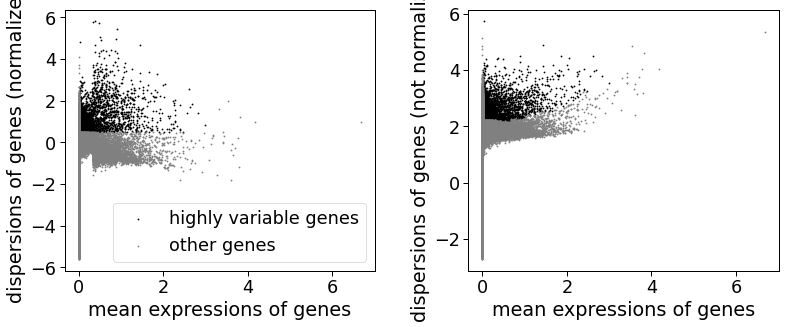

In [7]:
sc.pl.highly_variable_genes(adata)


In [6]:
adata.obs.head()

lab_sample_id sample      plate    subpool  \
cellID                                                                          
B11_B9_A12_Subpool_4_igvf_008b    024_B6J_10F_08     NA  igvf_008b  Subpool_4   
H9_A1_D6_Subpool_4_igvf_008b     050_NZOJ_10F_08     NA  igvf_008b  Subpool_4   
C9_C4_H9_Subpool_4_igvf_008b     076_PWKJ_10F_08     NA  igvf_008b  Subpool_4   
F12_F12_A6_Subpool_4_igvf_008b  095_CASTJ_10M_08     NA  igvf_008b  Subpool_4   
D11_B12_A3_Subpool_4_igvf_008b   084_PWKJ_10F_08     NA  igvf_008b  Subpool_4   

                               SampleType   Tissue     Sex     Age Genotype  \
cellID                                                                        
B11_B9_A12_Subpool_4_igvf_008b     Nuclei  Adrenal  Female  PNM_02      B6J   
H9_A1_D6_Subpool_4_igvf_008b       Nuclei  Adrenal  Female  PNM_02     NZOJ   
C9_C4_H9_Subpool_4_igvf_008b       Nuclei  Adrenal  Female  PNM_02     PWKJ   
F12_F12_A6_Subpool_4_igvf_008b     Nuclei  Adrenal    Male  PNM_02    CASTJ   
D11_B12_A3_Subpool_4_igvf_008b     Nuclei  Adrenal  Female  PNM_02     PWKJ   

                               subpool_type  ... total_counts_mt_cb  \
cellID                                       ...                      
B11_B9_A12_Subpool_4_igvf_008b           NO  ...               53.0   
H9_A1_D6_Subpool_4_igvf_008b             NO  ...               59.0   
C9_C4_H9_Subpool_4_igvf_008b             NO  ...               22.0   
F12_F12_A6_Subpool_4_igvf_008b           NO  ...              105.0   
D11_B12_A3_Subpool_4_igvf_008b           NO  ...               64.0   

                               pct_counts_mt_cb doublet_score  \
cellID                                                          
B11_B9_A12_Subpool_4_igvf_008b         0.035880      0.107981   
H9_A1_D6_Subpool_4_igvf_008b           0.040156      0.079295   
C9_C4_H9_Subpool_4_igvf_008b           0.015614      0.123077   
F12_F12_A6_Subpool_4_igvf_008b         0.074647      0.088729   
D11_B12_A3_Subpool_4_igvf_008b         0.046376      0.088729   

                               predicted_doublet background_fraction  \
cellID                                                                 
B11_B9_A12_Subpool_4_igvf_008b             False            0.000785   
H9_A1_D6_Subpool_4_igvf_008b               False            0.000551   
C9_C4_H9_Subpool_4_igvf_008b                True            0.000816   
F12_F12_A6_Subpool_4_igvf_008b             False            0.000526   
D11_B12_A3_Subpool_4_igvf_008b             False            0.000659   

                               cell_probability     cell_size  \
cellID                                                          
B11_B9_A12_Subpool_4_igvf_008b         0.999955  59390.523438   
H9_A1_D6_Subpool_4_igvf_008b           0.999955  59062.757812   
C9_C4_H9_Subpool_4_igvf_008b           0.999955  56671.863281   
F12_F12_A6_Subpool_4_igvf_008b         0.999955  56561.390625   
D11_B12_A3_Subpool_4_igvf_008b         0.999955  55507.503906   

                               droplet_efficiency leiden leiden_R  
cellID                                                             
B11_B9_A12_Subpool_4_igvf_008b                2.5      7        7  
H9_A1_D6_Subpool_4_igvf_008b                  2.5     12       12  
C9_C4_H9_Subpool_4_igvf_008b                  2.5     27       27  
F12_F12_A6_Subpool_4_igvf_008b                2.5     14     14_3  
D11_B12_A3_Subpool_4_igvf_008b                2.5     27       27  

[5 rows x 49 columns]

In [7]:
adata.var.head()

gene_id      gene_name     mt  highly_variable  \
gene_name                                                                    
4933401J01Rik  ENSMUSG00000102693.2  4933401J01Rik  False            False   
Gm26206        ENSMUSG00000064842.3        Gm26206  False            False   
Xkr4           ENSMUSG00000051951.6           Xkr4  False             True   
Gm18956        ENSMUSG00000102851.2        Gm18956  False            False   
Gm37180        ENSMUSG00000103377.2        Gm37180  False            False   

                      means  dispersions  dispersions_norm  
gene_name                                                   
4933401J01Rik  4.792876e-06     0.566236         -1.552152  
Gm26206        1.000000e-12          NaN               NaN  
Xkr4           7.813875e-01     2.774248          1.630445  
Gm18956        5.932444e-05     1.913625          0.105508  
Gm37180        2.109856e-02     1.789169         -0.047607

In [8]:
def stacked_barplot_proportions(adata, cluster_key, var_key, fsize=(12, 6), annotations=True, reverse_order=False, custom_order=None, custom_colors=None):
    colors = sns.color_palette("husl", n_colors=len(adata[var_key].unique()))

    # Group the data by 'cluster_key' and 'var_key', count occurrences, and calculate proportions
    grouped_data = adata.groupby([cluster_key, var_key]).size().unstack().fillna(0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Apply custom order if provided
    if custom_order:
        proportions = proportions.loc[custom_order]
    if custom_colors:
        colors = custom_colors

    # Reverse the order of the DataFrame if reverse_order is True
    if reverse_order:
        proportions = proportions.iloc[::-1]
        m = adata.groupby([cluster_key]).size().to_frame().iloc[::-1]
    else:
        m = adata.groupby([cluster_key]).size().to_frame()

    #sns.set_style('white')
    # Create the stacked bar plot
    ax = proportions.plot(kind='barh', color=colors, stacked=True, figsize=fsize, width=0.8, edgecolor=None)

    if annotations:
        for i, txt in enumerate(m[0]):
            ax.text(0.875, i, txt, fontsize=14, va='center', transform=ax.get_yaxis_transform())

    plt.xlim(0, 1.15)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(cluster_key)
    ax.set_title(f'{var_key} by {cluster_key}')

    if annotations:
        ax.legend(title=var_key, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    
    plt.show()

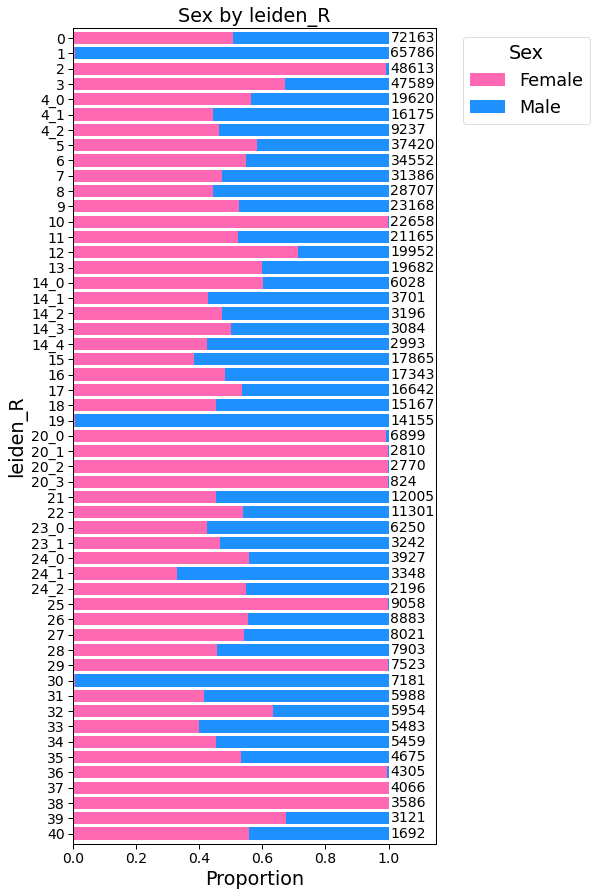

In [9]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'Sex',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = sex_palette,
                            annotations = True)


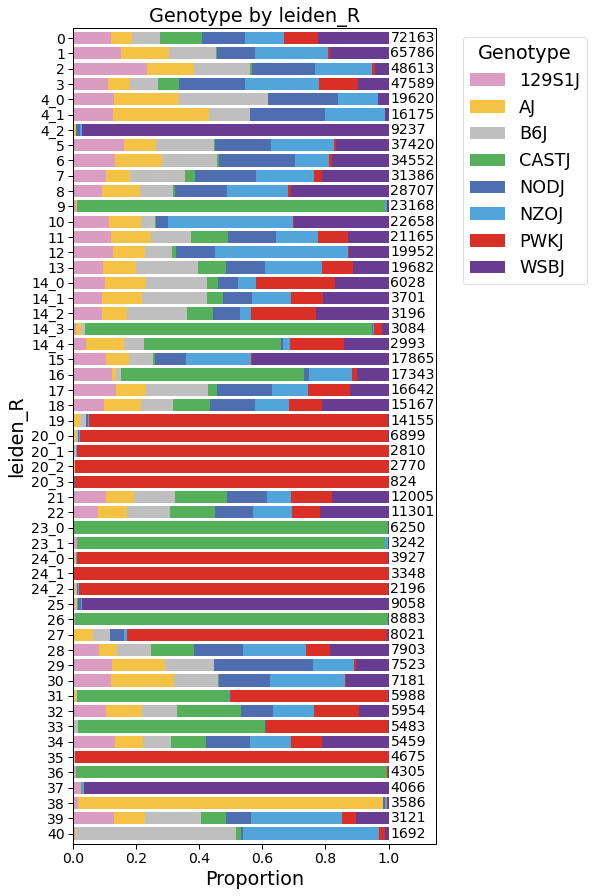

In [10]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'Genotype',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = geno_palette,
                            annotations = True)


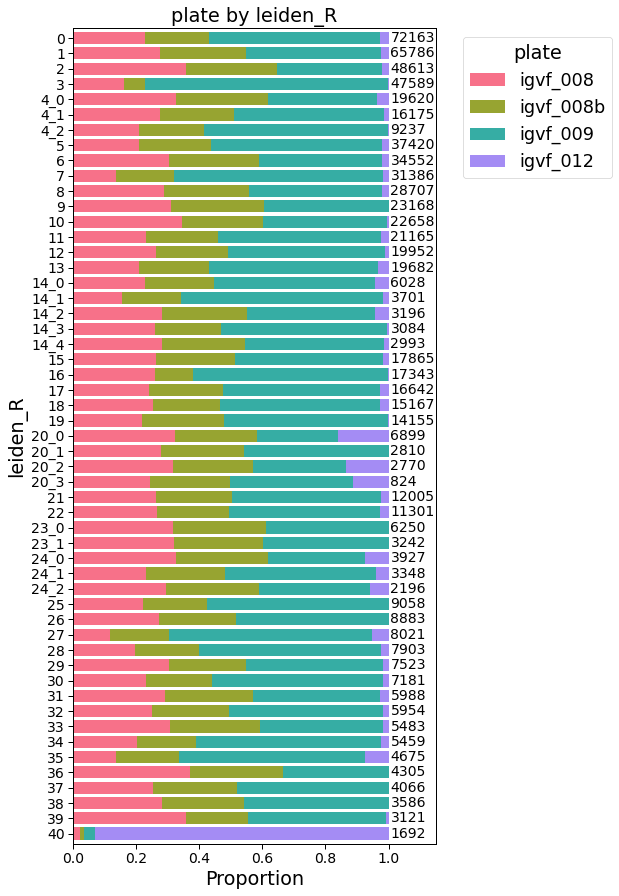

In [11]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'plate',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = plate_palette,
                            annotations = True)


In [12]:
marker_genes_dict = {
        "Cortex_ZF": ["Cyp11b1","Nr5a1","Cyp11a1","Star"],
        "Endothelial": ["Tek","Flt1","Pecam1"],
        "Cortex_ZG": ["Cyp11b2","Dab2"],
        "Medulla": ["Chga","Th","Pnmt"],
        "Stromal": ["Pdgfra","Cyp1b1","Mgp"],
        "X_zone": ["Pik3c2g","Akr1c18","Runx2","Ar"],
        "Fibroblast":["Postn","Dcn","Col1a1","Col1a2"],
        "Adipocyte": ["Acsl1","Pparg","Adipoq","Pnpla2"],
        "Macrophage": ["F13a1","Csf1r","Cd86"],
        "Sox10": ["Sox10"],
        "Cycling": ["Top2a","Mki67"],
        "Circulating hepatoblast":["Alb","Ttr","Cyp2b9","Ces1c","Apoa2","Hal"],    
    }


categories: 0, 1, 2, etc.
var_group_labels: Cortex_ZF, Endothelial, Cortex_ZG, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


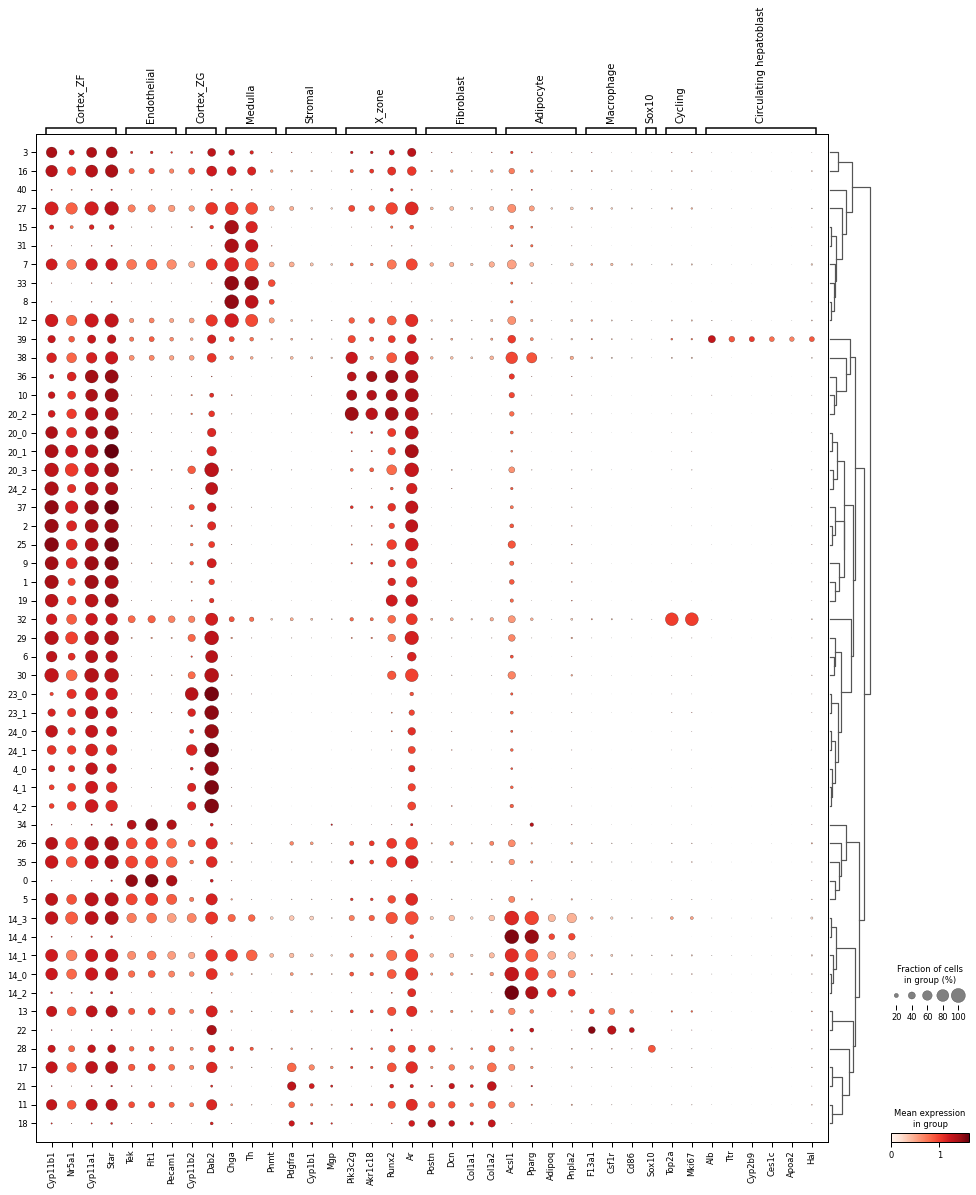

In [13]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden_R', mean_only_expressed = True,
              dendrogram=True, log=True)


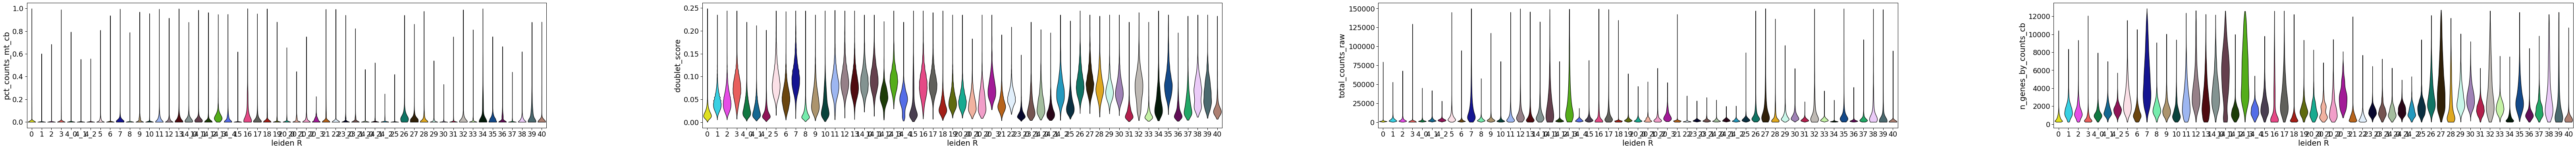

In [14]:
plt.rcParams['figure.figsize'] = (18, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "leiden_R", 
             jitter=0.4, multi_panel=True, size=0)

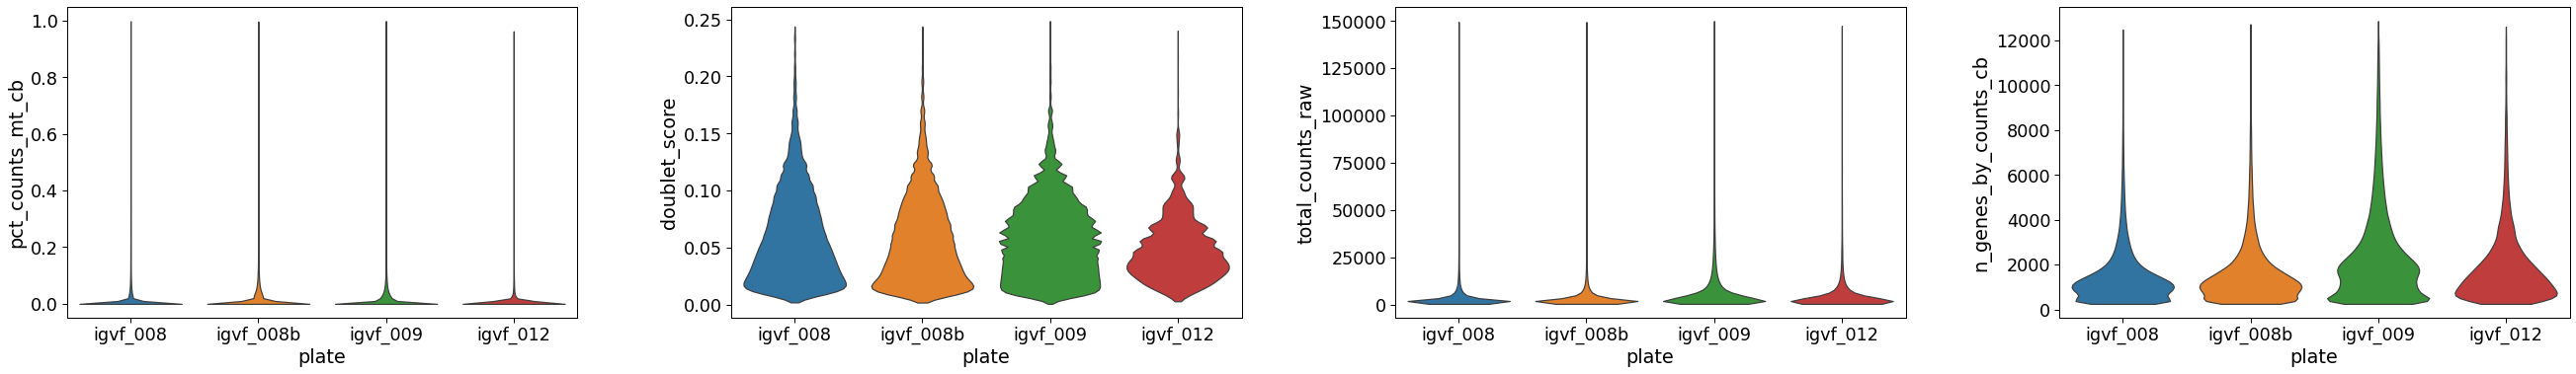

In [15]:
plt.rcParams['figure.figsize'] = (8, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "plate", 
             jitter=0.4, multi_panel=True, size=0)

In [16]:
plt.rcParams['figure.figsize'] = (8, 8)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


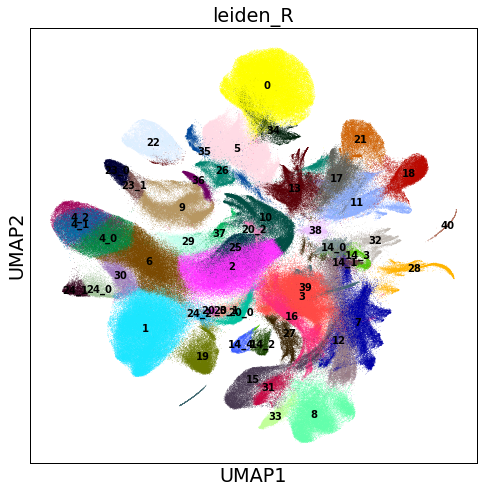

In [17]:
sc.pl.umap(adata, color=['leiden_R'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


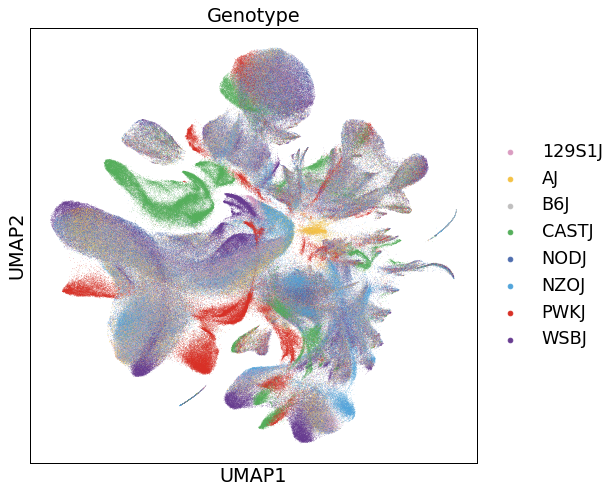

In [18]:
sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


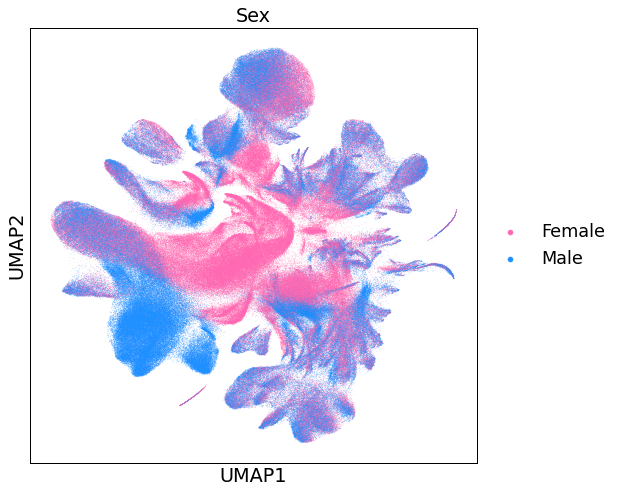

In [19]:
sc.pl.umap(adata, color=['Sex'], size = 0.8, palette = sex_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


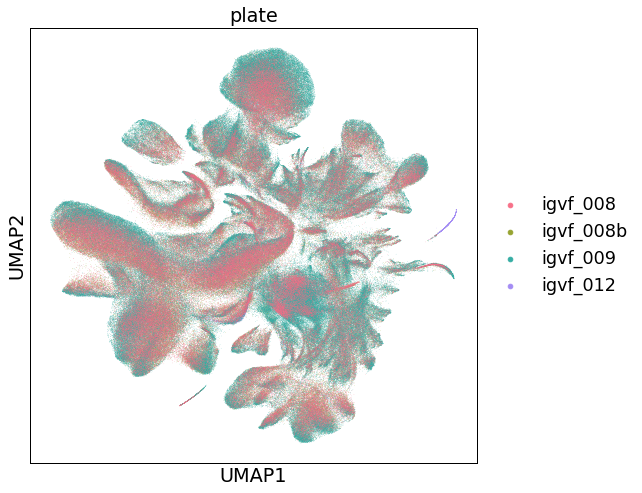

In [20]:
sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)


In [21]:
plt.rcParams['figure.figsize'] = (8, 8)


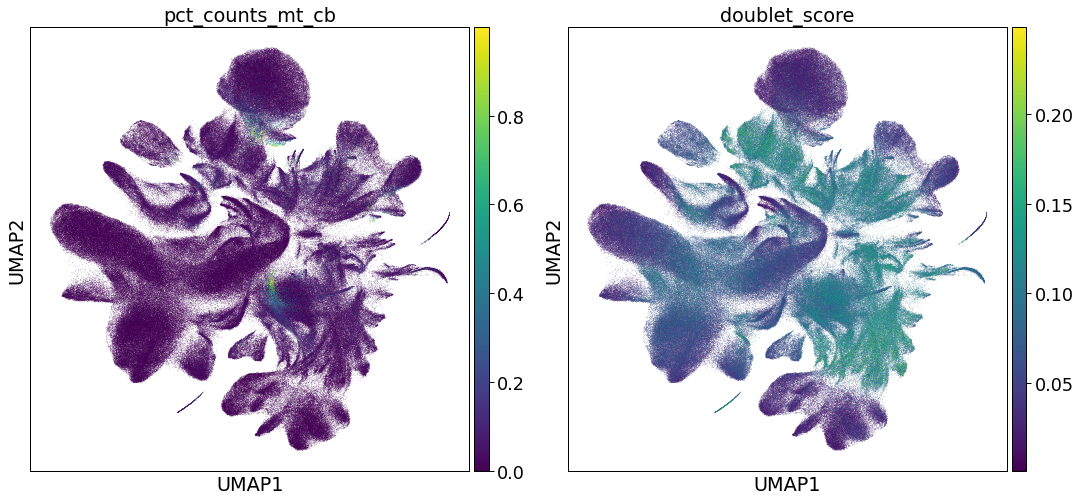

In [22]:
sc.pl.umap(adata, color=['pct_counts_mt_cb','doublet_score'], size = 0.8, palette = plate_palette)


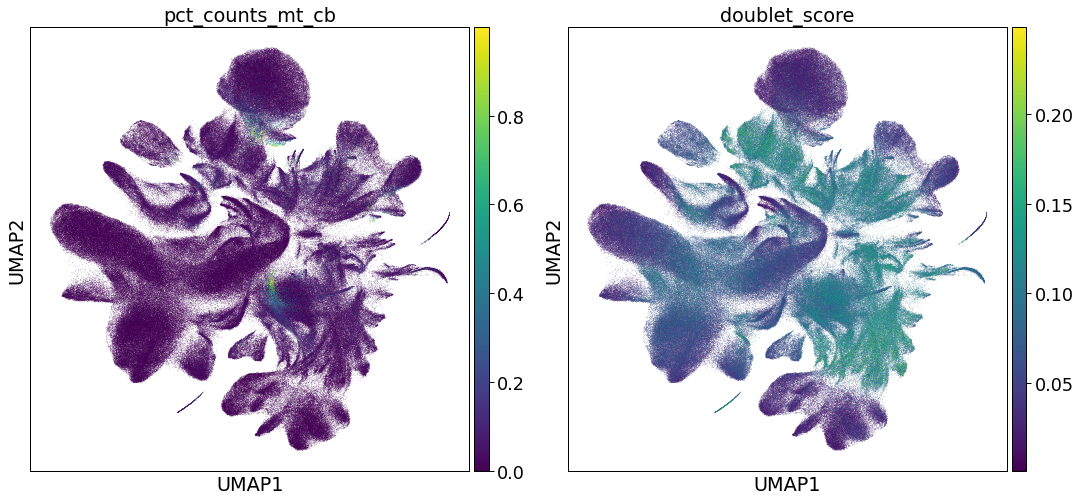

In [23]:
sc.pl.umap(adata, color=['pct_counts_mt_cb','doublet_score'], size = 0.8, palette = plate_palette)


In [24]:
old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')
old_annots['subpool'] = old_annots['subpool'].str.replace(r'Sublibrary_(\d+)', r'Subpool_\1', regex=True)

subpool_mapping = {
    "13A": "Subpool_1",
    "13B": "Subpool_2",
    "13C": "Subpool_3",
    "13D": "Subpool_4",
    "13E": "Subpool_5",
    "13F": "Subpool_6",
    "13G": "Subpool_7",
    "13H": "Subpool_8"
}

# Update the subpool column for the specified plate
old_annots.loc[old_annots['plate'] == 'igvf_012', 'subpool'] = (
    old_annots['subpool'].map(subpool_mapping)
)


old_annots['cellID'] = old_annots['bc1_well'] + "_" + old_annots['bc2_well'] + "_" + old_annots['bc3_well'] + "_" + old_annots['subpool']  + "_" + old_annots['plate'] 



/tmp/ipykernel_3691905/134062919.py:1: DtypeWarning: Columns (11,12,13,21,22,23,31,36,37,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')


In [25]:
new_cells = adata.obs.index.tolist()
old_cells = old_annots['cellID'].tolist()

new_cells_series = pd.Series(new_cells)
old_cells_series = pd.Series(old_cells)


old_in_new = old_cells_series.isin(new_cells)
new_in_old = new_cells_series.isin(old_cells)


old_not_in_new = old_cells_series[~old_in_new]
new_not_in_old = new_cells_series[~new_in_old]

print(f"Number of old_cells not in new_cells: {len(old_not_in_new)}")

print(f"Number of new_cells not in old_cells: {len(new_not_in_old)}")


Number of old_cells not in new_cells: 40710
Number of new_cells not in old_cells: 126769


In [26]:
old_annots.set_index('cellID', inplace=True)
transfer_df = old_annots[['subtype', 'celltype']]

adata_obs = adata.obs.copy()

# Merge the dataframes, adding the 'subtype' and 'celltype' columns to adata.obs
adata_obs = adata_obs.join(transfer_df, how='left')


In [27]:
# Ensure missing values are explicitly set as NA
adata_obs['subtype'].fillna(value="NA", inplace=True)
adata_obs['celltype'].fillna(value="NA", inplace=True)

In [28]:
adata_obs.head()

lab_sample_id sample      plate    subpool  \
cellID                                                                          
B11_B9_A12_Subpool_4_igvf_008b    024_B6J_10F_08     NA  igvf_008b  Subpool_4   
H9_A1_D6_Subpool_4_igvf_008b     050_NZOJ_10F_08     NA  igvf_008b  Subpool_4   
C9_C4_H9_Subpool_4_igvf_008b     076_PWKJ_10F_08     NA  igvf_008b  Subpool_4   
F12_F12_A6_Subpool_4_igvf_008b  095_CASTJ_10M_08     NA  igvf_008b  Subpool_4   
D11_B12_A3_Subpool_4_igvf_008b   084_PWKJ_10F_08     NA  igvf_008b  Subpool_4   

                               SampleType   Tissue     Sex     Age Genotype  \
cellID                                                                        
B11_B9_A12_Subpool_4_igvf_008b     Nuclei  Adrenal  Female  PNM_02      B6J   
H9_A1_D6_Subpool_4_igvf_008b       Nuclei  Adrenal  Female  PNM_02     NZOJ   
C9_C4_H9_Subpool_4_igvf_008b       Nuclei  Adrenal  Female  PNM_02     PWKJ   
F12_F12_A6_Subpool_4_igvf_008b     Nuclei  Adrenal    Male  PNM_02    CASTJ   
D11_B12_A3_Subpool_4_igvf_008b     Nuclei  Adrenal  Female  PNM_02     PWKJ   

                               subpool_type  ... doublet_score  \
cellID                                       ...                 
B11_B9_A12_Subpool_4_igvf_008b           NO  ...      0.107981   
H9_A1_D6_Subpool_4_igvf_008b             NO  ...      0.079295   
C9_C4_H9_Subpool_4_igvf_008b             NO  ...      0.123077   
F12_F12_A6_Subpool_4_igvf_008b           NO  ...      0.088729   
D11_B12_A3_Subpool_4_igvf_008b           NO  ...      0.088729   

                               predicted_doublet background_fraction  \
cellID                                                                 
B11_B9_A12_Subpool_4_igvf_008b             False            0.000785   
H9_A1_D6_Subpool_4_igvf_008b               False            0.000551   
C9_C4_H9_Subpool_4_igvf_008b                True            0.000816   
F12_F12_A6_Subpool_4_igvf_008b             False            0.000526   
D11_B12_A3_Subpool_4_igvf_008b             False            0.000659   

                               cell_probability     cell_size  \
cellID                                                          
B11_B9_A12_Subpool_4_igvf_008b         0.999955  59390.523438   
H9_A1_D6_Subpool_4_igvf_008b           0.999955  59062.757812   
C9_C4_H9_Subpool_4_igvf_008b           0.999955  56671.863281   
F12_F12_A6_Subpool_4_igvf_008b         0.999955  56561.390625   
D11_B12_A3_Subpool_4_igvf_008b         0.999955  55507.503906   

                               droplet_efficiency leiden leiden_R  \
cellID                                                              
B11_B9_A12_Subpool_4_igvf_008b                2.5      7        7   
H9_A1_D6_Subpool_4_igvf_008b                  2.5     12       12   
C9_C4_H9_Subpool_4_igvf_008b                  2.5     27       27   
F12_F12_A6_Subpool_4_igvf_008b                2.5     14     14_3   
D11_B12_A3_Subpool_4_igvf_008b                2.5     27       27   

                                    subtype     celltype  
cellID                                                    
B11_B9_A12_Subpool_4_igvf_008b  low quality  low quality  
H9_A1_D6_Subpool_4_igvf_008b    low quality  low quality  
C9_C4_H9_Subpool_4_igvf_008b    low quality  low quality  
F12_F12_A6_Subpool_4_igvf_008b     fat cell     fat cell  
D11_B12_A3_Subpool_4_igvf_008b  low quality  low quality  

[5 rows x 51 columns]

In [29]:
adata.obs['celltype_carryover'] = adata_obs['celltype']
adata.obs['subtype_carryover'] = adata_obs['subtype']

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


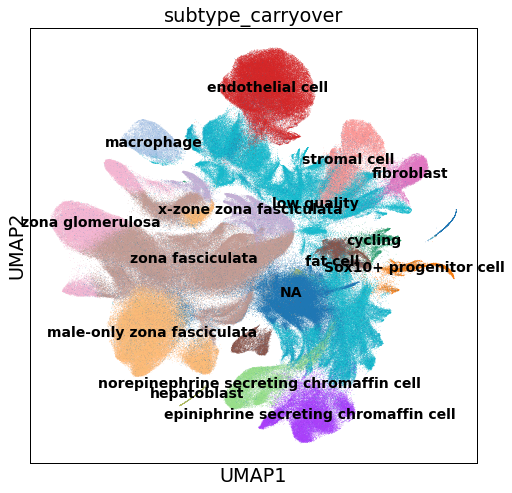

In [30]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1, legend_fontsize = 14, legend_loc = "on data")


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


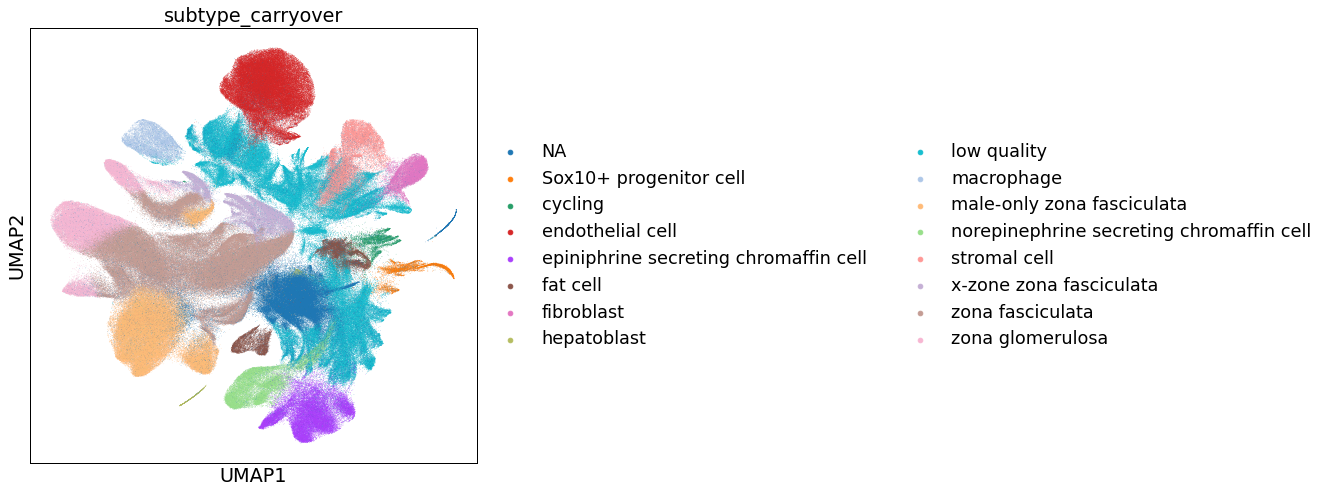

In [31]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


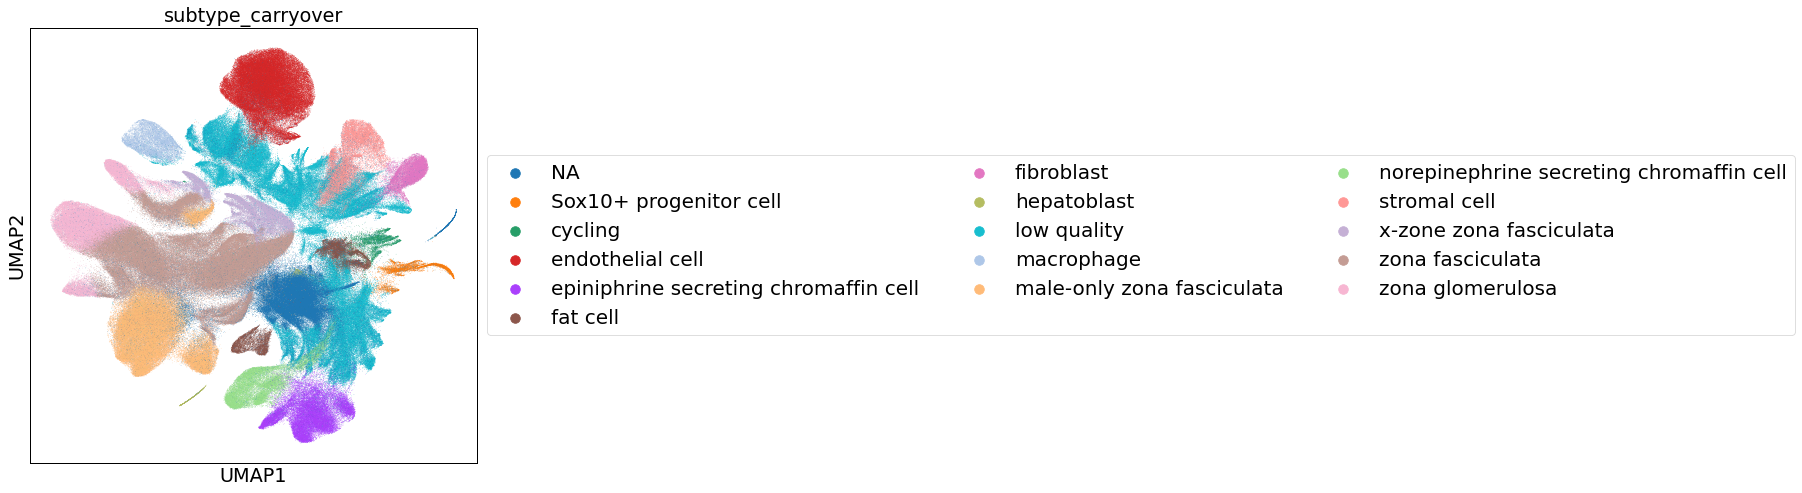

In [32]:
# Plot UMAP
ax = sc.pl.umap(adata, color=['subtype_carryover'], size=1, legend_fontsize=20, show=False)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=2, fontsize=20, ncol=3)
plt.show()

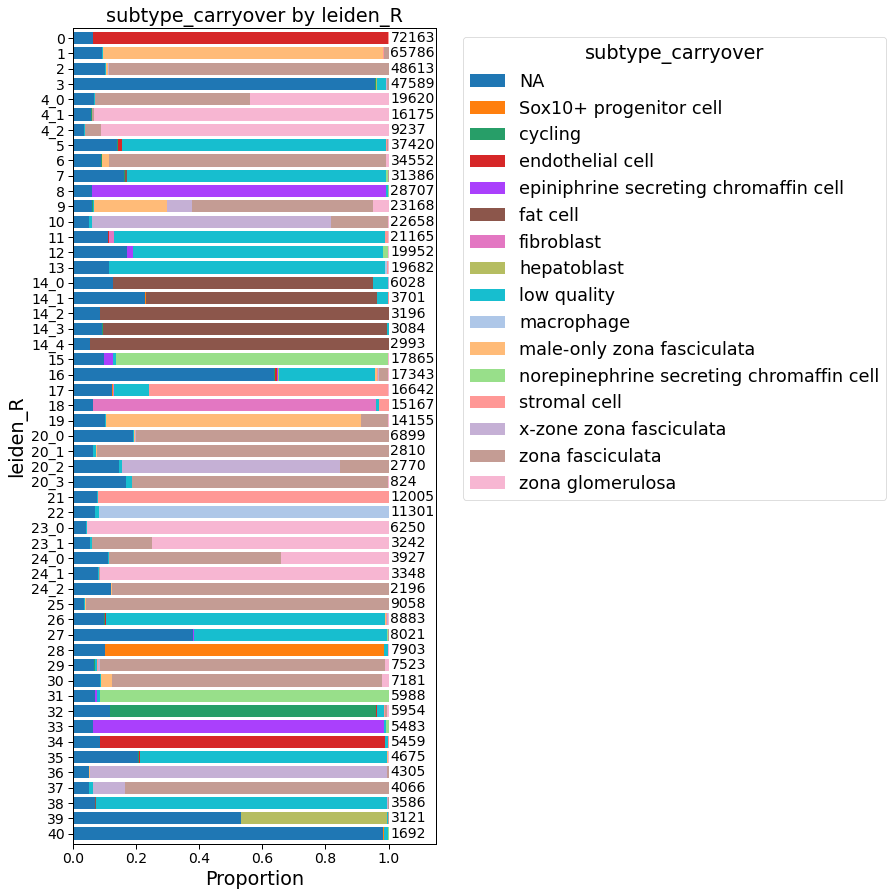

In [33]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'subtype_carryover',
                            reverse_order = True,
                            custom_colors = adata.uns["subtype_carryover_colors"],
                            fsize = (6.5,15), 
                            annotations = True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


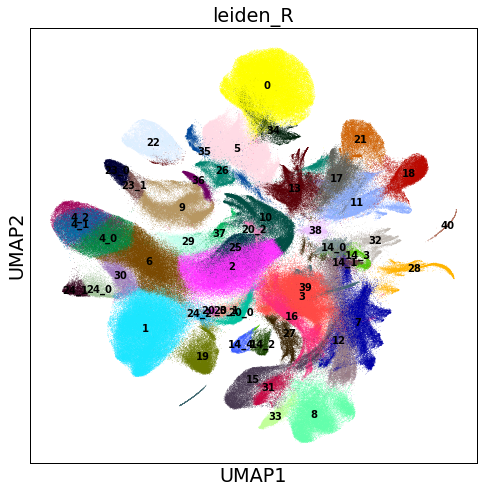

In [34]:
sc.pl.umap(adata, color=['leiden_R'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


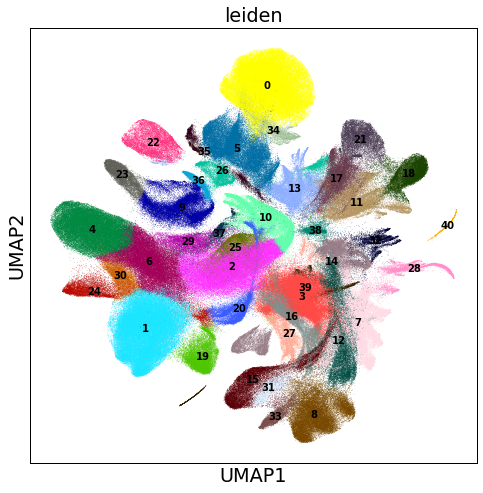

In [35]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 10, legend_loc = 'on data')


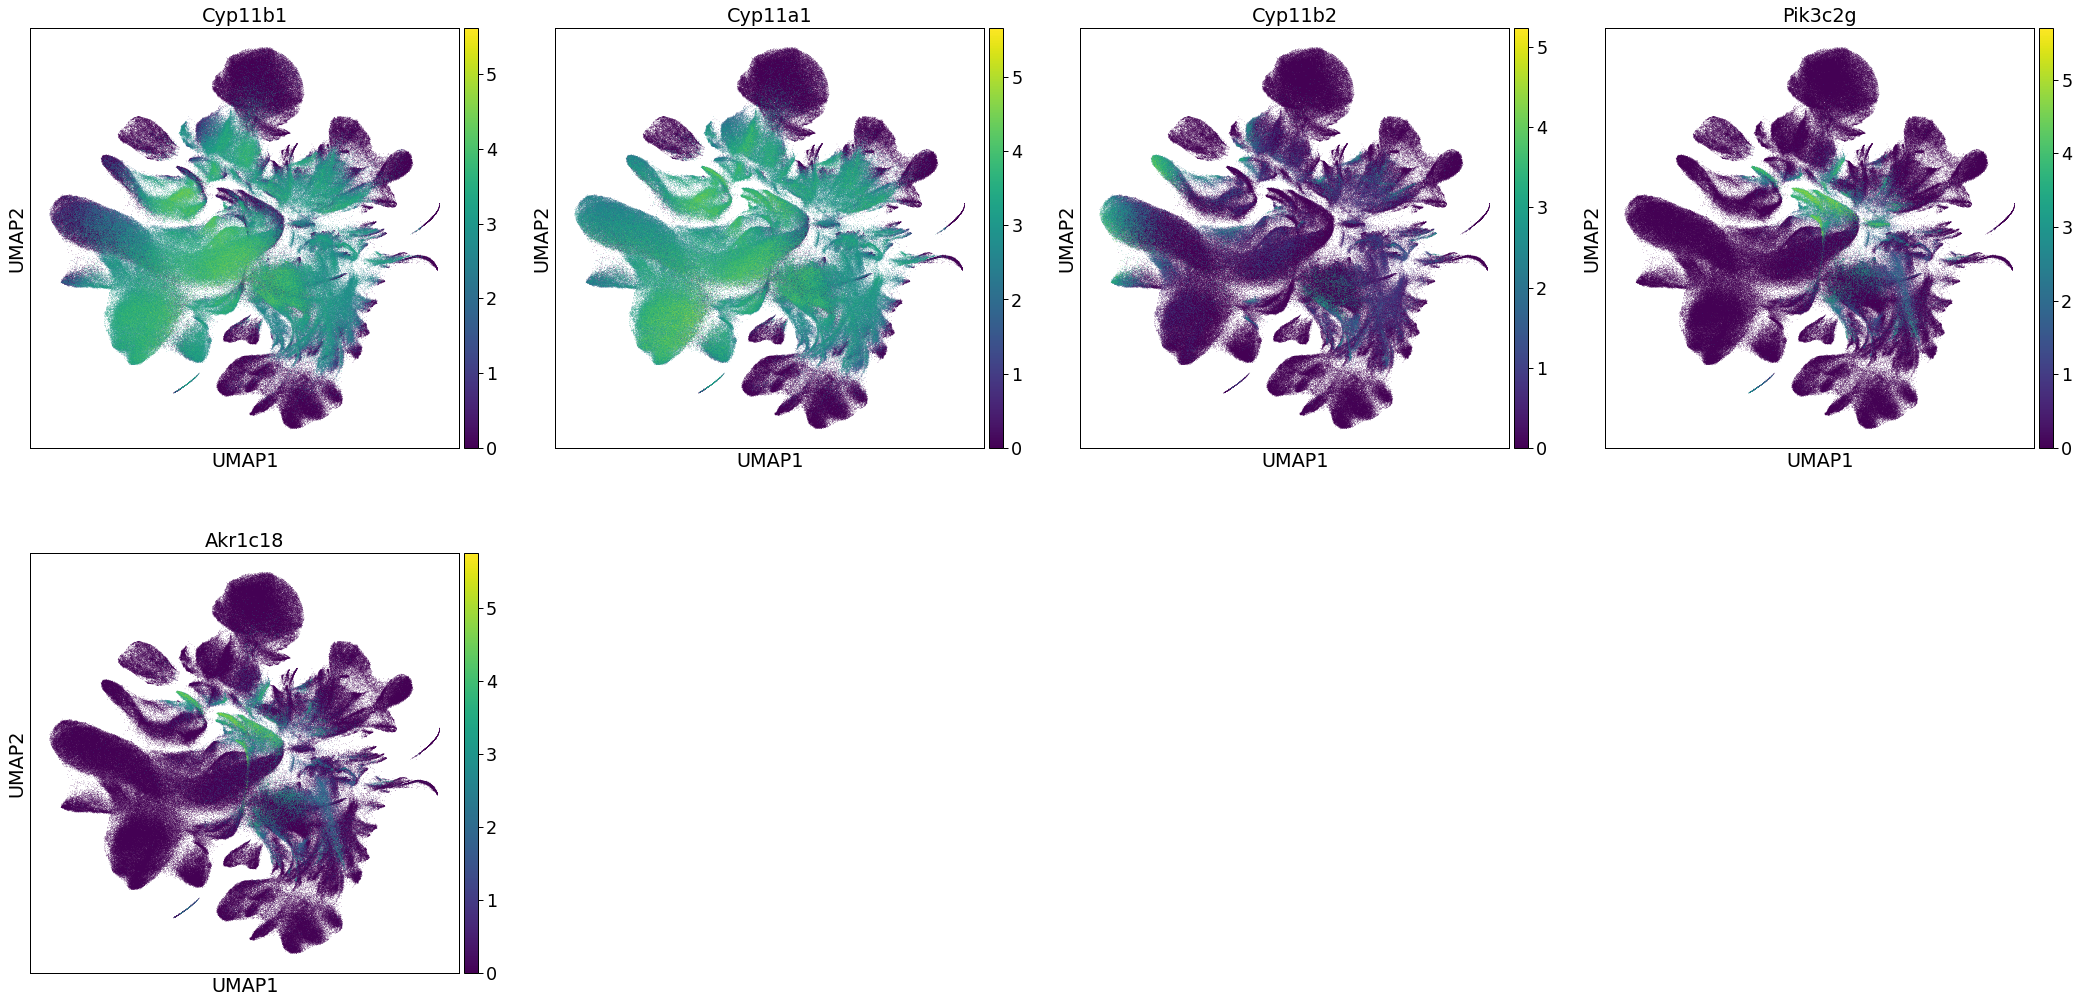

In [36]:
sc.pl.umap(adata, color=['Cyp11b1','Cyp11a1','Cyp11b2','Pik3c2g','Akr1c18'], size=1, legend_fontsize = 10, legend_loc = 'on data')


# Annotation

In [39]:
annots = pd.read_csv("post_cellbender_annotations.csv")
annots = annots[annots['tissue'] == tissue]
annots['leiden_R'] = annots['leiden_R'].astype(str)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['general_celltype'].to_dict()
adata.obs['general_celltype'] = adata.obs['leiden_R'].map(annotation_dict)
annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['general_CL_ID'].to_dict()
adata.obs['general_CL_ID'] = adata.obs['leiden_R'].map(annotation_dict)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['celltype'].to_dict()
adata.obs['celltype'] = adata.obs['leiden_R'].map(annotation_dict)
annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['CL_ID'].to_dict()
adata.obs['CL_ID'] = adata.obs['leiden_R'].map(annotation_dict)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['subtype'].to_dict()
adata.obs['subtype'] = adata.obs['leiden_R'].map(annotation_dict)



/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


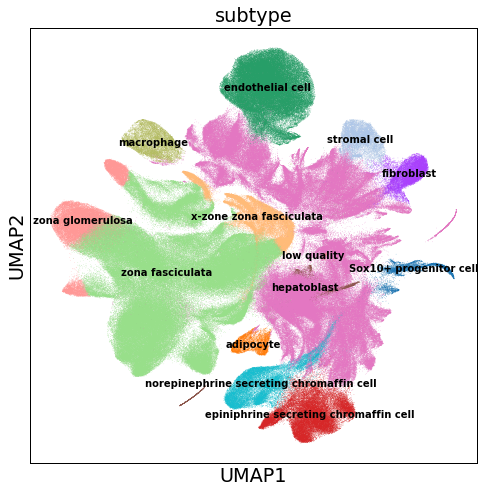

In [40]:
sc.pl.umap(adata, color=['subtype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


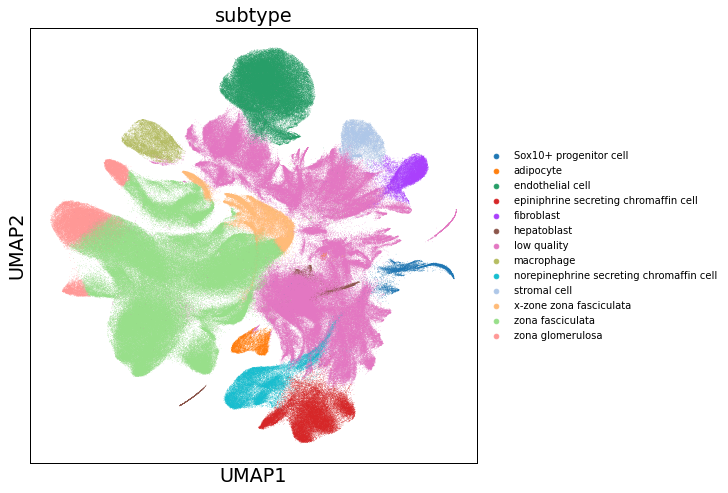

In [41]:
sc.pl.umap(adata, color=['subtype'], size=1, legend_fontsize = 10)


In [42]:
adata.obs.drop(columns='celltype_carryover', inplace=True)
adata.obs.drop(columns='subtype_carryover', inplace=True)


In [43]:
adata

AnnData object with n_obs × n_vars = 766517 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'leiden_R', 'general_celltype', 'general_CL_ID', 'celltype', 'CL_ID', 'subtype'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_R', 'log1

In [44]:
meta = adata.obs
meta.to_csv(f"../IGVF_analysis/cellbender_tissues/obs_tables/{tissue}_annotated_metadata.csv")


In [45]:
adata.write_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_annotated.h5ad')


In [4]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/annotated/{tissue}_annotated.h5ad')


In [5]:
adata.obs['subtype_genotype'] = adata.obs['subtype'].astype(str) + "_" + adata.obs['Genotype'].astype(str)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


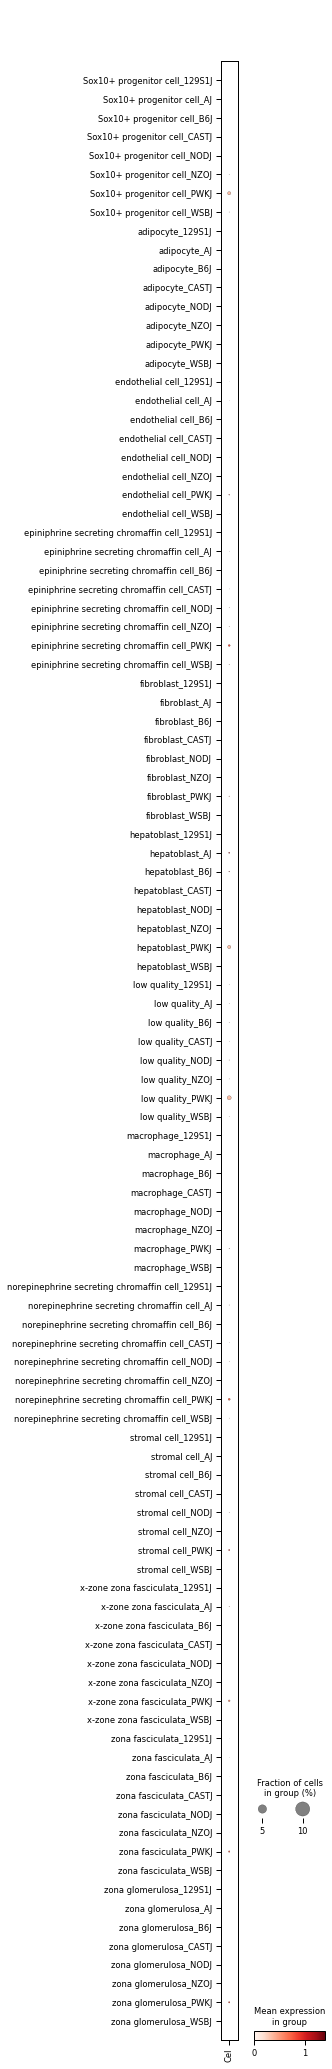

In [6]:
sc.pl.dotplot(adata, ['Cel'], 'subtype_genotype', mean_only_expressed = True,
              dendrogram=False, log=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


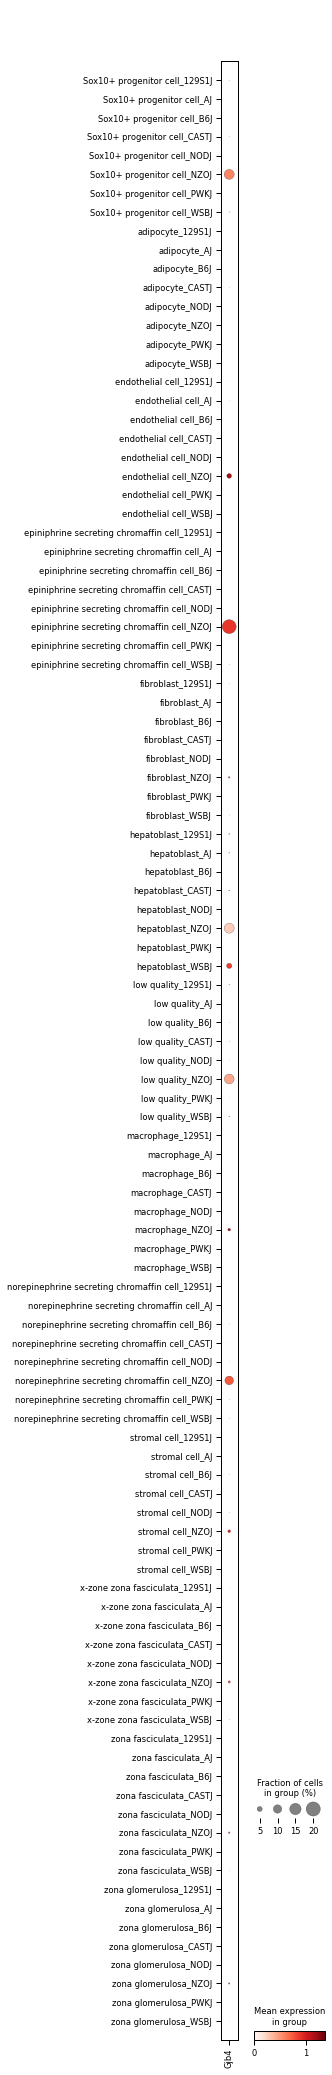

In [7]:
sc.pl.dotplot(adata, ['Gjb4'], 'subtype_genotype', mean_only_expressed = True,
              dendrogram=False, log=True)
